In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset and display the first 5 row
df=pd.read_csv(r"ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
#Check the dataset shape (rows, columns)
df.shape

(10000, 11)

In [4]:
#Display column names and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
#Check for missing values in each column.
missing=df.isnull().sum()
print (missing)

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


In [6]:
#Show summary statistics for SessionLengthMin and TotalPrompts.
print (df[["SessionLengthMin","TotalPrompts"]].describe())

       SessionLengthMin  TotalPrompts
count      10000.000000  10000.000000
mean          19.846467      5.607500
std           13.897302      4.648764
min            0.030000      1.000000
25%            9.630000      2.000000
50%           16.650000      4.000000
75%           26.670000      8.000000
max          110.810000     39.000000


In [7]:
#Find the number of unique values in StudentLevel, Discipline, and TaskType.
print ("Unique values in studentlevel:",df["StudentLevel"].unique())
print ("Unique values in Discipline:",df["Discipline"].unique())
print ("Unique values in Taktype:",df["TaskType"].unique())

Unique values in studentlevel: ['Undergraduate' 'Graduate' 'High School']
Unique values in Discipline: ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
Unique values in Taktype: ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']


In [8]:
#Which TaskType is the most common?
df["TaskType"].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

The common task is writing

In [9]:
#Calculate the average SessionLengthMin for each StudentLevel.
average_session=df.groupby("StudentLevel")["SessionLengthMin"].mean()
print(average_session)

StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64


Part B: Visualization

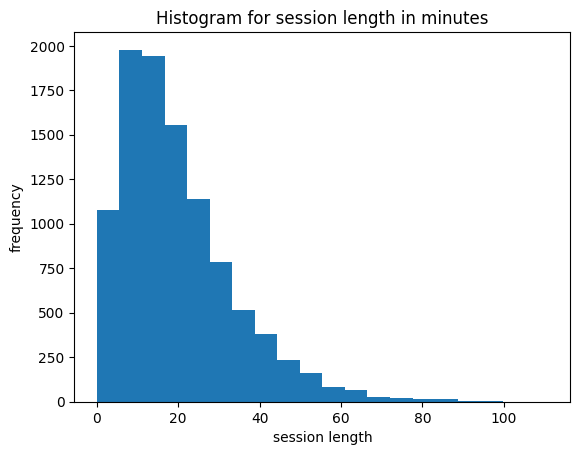

In [10]:
#Plot a histogram of SessionLengthMin.
plt.Figure(figsize=(6,4))
plt.hist(df["SessionLengthMin"],bins=20)
plt.xlabel("session length")
plt.ylabel("frequency")
plt.title("Histogram for session length in minutes")
plt.show()

In [11]:
session_counts=df["StudentLevel"].value_counts()
print(session_counts)

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64


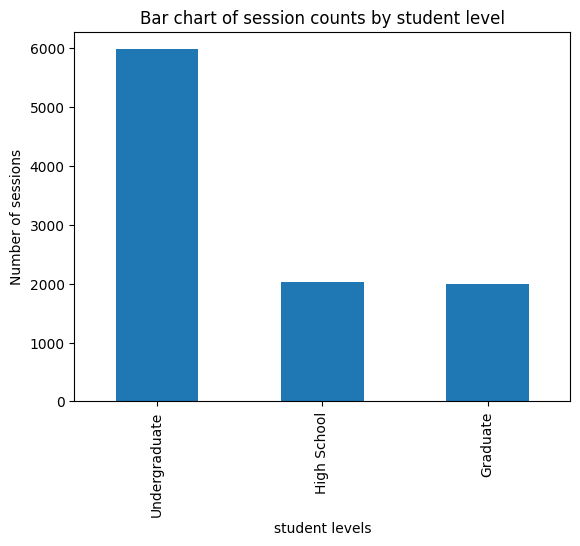

In [12]:
#Create a bar chart of session counts by StudentLevel.

plt.Figure(figsize=(6,4))
session_counts.plot(kind="bar")
plt.title("Bar chart of session counts by student level")
plt.xlabel("student levels")
plt.ylabel("Number of sessions")
plt.show()          

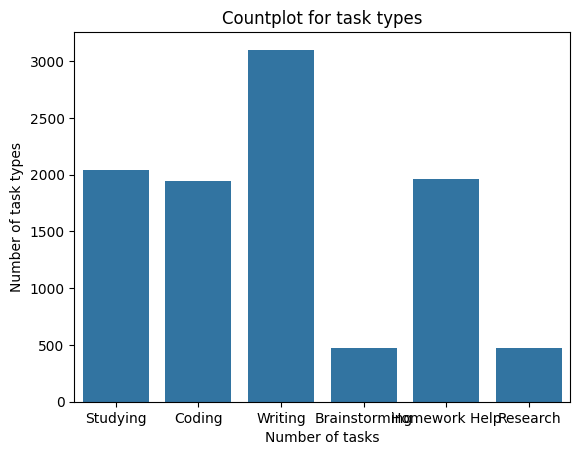

In [13]:
#Make a countplot of TaskType using Seaborn.
plt.Figure(figsize=(10,6))
sns.countplot(x="TaskType", data=df)
plt.xlabel("Number of tasks")
plt.ylabel("Number of task types")
plt.title("Countplot for task types")
plt.show()

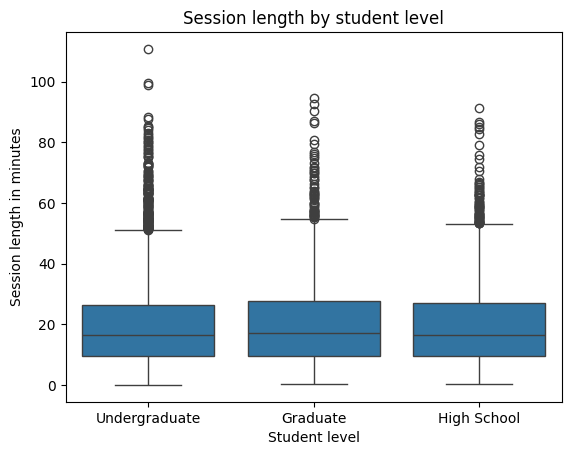

In [14]:
#Plot a boxplot of SessionLengthMin grouped by StudentLevel.
plt.Figure(figsize=(6,4))
sns.boxplot(x="StudentLevel", y="SessionLengthMin",data=df)
plt.xlabel("Student level")
plt.ylabel("Session length in minutes")
plt.title("Session length by student level")
plt.show()

In [15]:
#Create a pie chart showing proportions of FinalOutcome.
finaloutcome_counts=df["FinalOutcome"].value_counts()
print (finaloutcome_counts)

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64


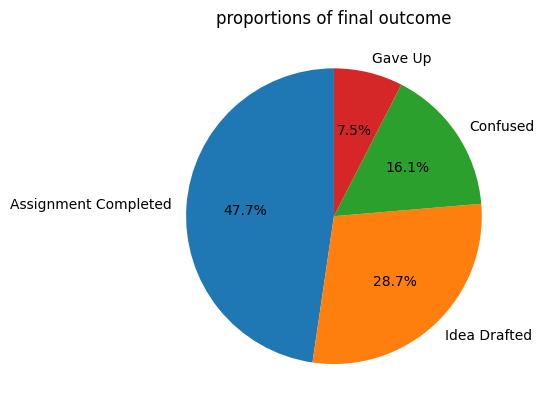

In [16]:
plt.Figure(figsize=(4,4))
plt.pie(finaloutcome_counts,labels=finaloutcome_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("proportions of final outcome")
plt.show()

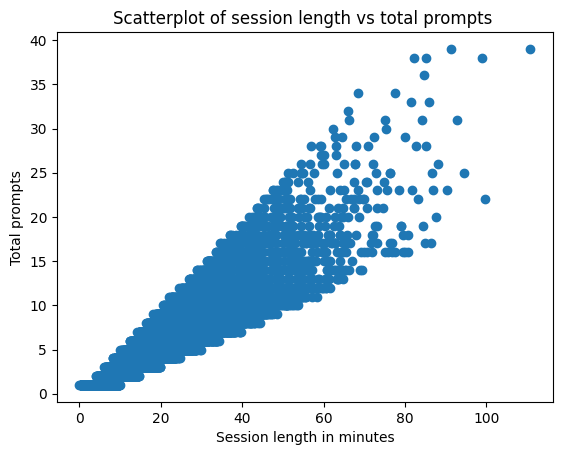

In [17]:
#Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
plt.Figure(figsize=(6,5))
plt.scatter(df["SessionLengthMin"], df["TotalPrompts"])
plt.title ("Scatterplot of session length vs total prompts ")
plt.xlabel("Session length in minutes")
plt.ylabel("Total prompts")
plt.show()

In [18]:
#Plot a line chart of average AI_AssistanceLevel over time (SessionDate).
average_ai_assistance=df.groupby("SessionDate")["AI_AssistanceLevel"].mean()
print (average_ai_assistance)

SessionDate
2024-06-24    3.451613
2024-06-25    3.181818
2024-06-26    3.500000
2024-06-27    3.428571
2024-06-28    3.826087
                ...   
2025-06-20    3.459459
2025-06-21    3.146341
2025-06-22    3.200000
2025-06-23    3.272727
2025-06-24    3.515152
Name: AI_AssistanceLevel, Length: 366, dtype: float64


In [19]:
df["SessionDate"]=pd.to_datetime(df["SessionDate"])

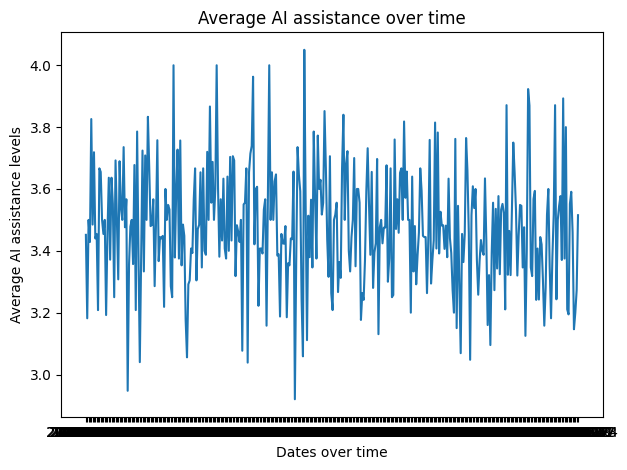

In [45]:
plt.plot(average_ai_assistance.index,average_ai_assistance.values)
plt.xlabel("Dates over time")
plt.ylabel("Average AI assistance levels")
plt.title("Average AI assistance over time")
plt.tight_layout()
plt.show()

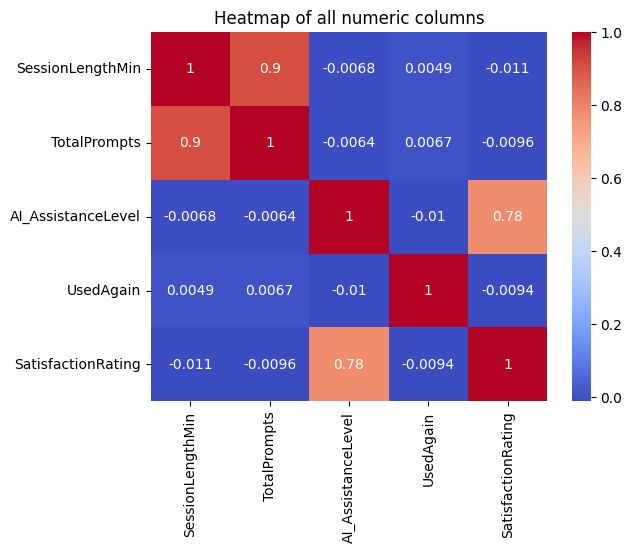

In [21]:
#Create a heatmap of correlations among numeric features.
correlation_matrix=df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm")
plt.title("Heatmap of all numeric columns")
plt.show()

Part C: GroupBy & Aggregations

In [22]:
#Find the average SessionLengthMin for each TaskType.
average_sessionlength_per_task=df.groupby("TaskType")["SessionLengthMin"].mean()
print (average_sessionlength_per_task)

TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64


In [23]:
#Which Discipline had the most sessions?
max_discipline=df["Discipline"].value_counts().idxmax() #idmax is for index label
session_count=df["Discipline"].value_counts().max()
print ("The discipline with most sessions is",max_discipline)
print ("The longest session is this time",session_count)

The discipline with most sessions is Biology
The longest session is this time 1458


In [24]:
#Compare average AI_AssistanceLevel across StudentLevel.
average_AI_per_level=df.groupby("StudentLevel")["AI_AssistanceLevel"].mean()
print (average_AI_per_level)

StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64


In [25]:
#Find the most common FinalOutcome for Graduate students
graduate_data=df[df["StudentLevel"]=="Graduate"]

#find graduates with highest outcome
highest_column=graduate_data["FinalOutcome"].value_counts().idxmax()
highest_finaloutcome=graduate_data["FinalOutcome"].value_counts().max()
print ("The most common final outcome is", highest_column)
print ("the number is",highest_finaloutcome)


The most common final outcome is Assignment Completed
the number is 936


In [26]:
#Calculate the median SessionLengthMin for each FinalOutcome.
median_sessionlength=df.groupby("FinalOutcome")["SessionLengthMin"].median()
median_sessionlength

FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64

Feature Engineering & Encoding

In [27]:
#Convert SessionDate into Year, Month, and Day columns.
df["SessionDate"]=pd.to_datetime(df["SessionDate"])

df["year"]=df["SessionDate"].dt.year
df["month"]=df["SessionDate"].dt.month
df["day"]= df["SessionDate"].dt.day

In [28]:
#Encode StudentLevel using Label Encoding.
df["StudentLevel_encoded"]=df["StudentLevel"].astype("category").cat.codes
df["StudentLevel_encoded"]

0       2
1       2
2       2
3       2
4       2
       ..
9995    2
9996    1
9997    2
9998    2
9999    2
Name: StudentLevel_encoded, Length: 10000, dtype: int8

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
#Apply One-Hot Encoding to TaskType.
df_encoded_tasktype=pd.get_dummies(df, columns=["TaskType"])
df_encoded_tasktype.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,year,month,day,StudentLevel_encoded,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,False,True,False
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,False,True,False
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,False,True,False,False,False,False
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,False,True,False,False,False,False
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,False,True


In [31]:
#Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
df["PromptsPerMinute"]=df["TotalPrompts"]/df["SessionLengthMin"]
df["PromptsPerMinute"]

0       0.352564
1       0.458365
2       0.260146
3       0.270270
4       0.320057
          ...   
9995    0.175994
9996    0.429185
9997    0.185529
9998    0.226684
9999    0.276498
Name: PromptsPerMinute, Length: 10000, dtype: float64

In [32]:
#Bin SessionLengthMin into categories: Short, Medium, Long.
#define bins and labels
bins=[0,80,120, float("inf")]
labels=["Short", "Medium", "Long"]

##create a new column
df["Sessionlength_categories"]=pd.cut(df["SessionLengthMin"], bins=bins, labels=labels, right=False)
df["Sessionlength_categories"].head()

0    Short
1    Short
2    Short
3    Short
4    Short
Name: Sessionlength_categories, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

Machine Learning (Classification Models)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Drop the datetime column
df = df.drop("SessionDate", axis=1)

# 1. Separate features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# 2. Encode target
le = LabelEncoder()
y = le.fit_transform(y)   # FinalOutcome is now numeric

# 3. Encode features (get_dummies for categorical features)
X = pd.get_dummies(X, drop_first=True)

In [35]:
##train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
#train decision tree
tree= DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
#make the predictions
y_pred=tree.predict(X_test)

In [38]:
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.486

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.89      0.64       930
           1       0.41      0.40      0.41       349
           2       0.00      0.00      0.00       170
           3       0.29      0.01      0.02       551

    accuracy                           0.49      2000
   macro avg       0.30      0.33      0.27      2000
weighted avg       0.39      0.49      0.37      2000


Confusion Matrix:
 [[826  96   0   8]
 [206 141   0   2]
 [109  59   0   2]
 [502  44   0   5]]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [40]:
#Predict UsedAgain using Logistic Regression.

# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 6: Predictions
y_pred = log_reg.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7635

Confusion Matrix:
 [[ 289  293]
 [ 180 1238]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.55       582
           1       0.81      0.87      0.84      1418

    accuracy                           0.76      2000
   macro avg       0.71      0.68      0.69      2000
weighted avg       0.75      0.76      0.76      2000



In [ ]:
#Train a Random Forest Classifier to predict FinalOutcome
x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#train random forest classifier
rfd= RandomForestClassifier(n_estimators=100, random_state=42)
rfd.fit(X_train,y_train)

#make predictions
y2_pred=rfd.predict(X_test)

##make evaluations
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nClassification Report:\n", classification_report(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))


Accuracy: 0.4715

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.87      0.63       930
           1       0.40      0.17      0.24       349
           2       0.00      0.00      0.00       170
           3       0.32      0.13      0.18       551

    accuracy                           0.47      2000
   macro avg       0.31      0.29      0.26      2000
weighted avg       0.39      0.47      0.39      2000


Confusion Matrix:
 [[813  38   2  77]
 [242  59   2  46]
 [119  26   0  25]
 [457  23   0  71]]


In [ ]:
##Use KNN (K-Nearest Neighbors) to classify UsedAgain.
from sklearn.neighbors import KNeighborsClassifier

# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

# Step 5: Train K-Nearest Neighbours
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

# Step 6: Predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6465

Confusion Matrix:
 [[  90  525]
 [ 182 1203]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.15      0.20       615
           1       0.70      0.87      0.77      1385

    accuracy                           0.65      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.58      0.65      0.60      2000



In [ ]:
#Train a Naive Bayes Classifier to predict FinalOutcome.
from sklearn.naive_bayes import GaussianNB

x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#Train Naive Bayes
nb= GaussianNB ()
nb.fit(X_train, y_train)

#make predictions
y2_pred=nb.predict(X_test)

##make evaluations
#evaluate the model
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nClassification Report:\n", classification_report(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))



Accuracy: 0.086

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       930
           1       0.40      0.01      0.01       349
           2       0.09      1.00      0.16       170
           3       0.00      0.00      0.00       551

    accuracy                           0.09      2000
   macro avg       0.12      0.25      0.04      2000
weighted avg       0.08      0.09      0.02      2000


Confusion Matrix:
 [[  0   2 928   0]
 [  0   2 347   0]
 [  0   0 170   0]
 [  0   1 550   0]]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [ ]:
#Build a Gradient Boosting Classifier for UsedAgain.

from sklearn.ensemble import GradientBoostingClassifier
# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Train Gradient boosting classifier
gb= GradientBoostingClassifier(n_estimators=300, random_state=100, max_features=5)
gb.fit(X_train, y_train)

# Step 6: Predictions
y_pred = gb.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.709

Confusion Matrix:
 [[   0  582]
 [   0 1418]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       582
           1       0.71      1.00      0.83      1418

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.59      2000



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [ ]:
#Apply an XGBoost Classifier to predict FinalOutcome.

import xgboost as xg
from sklearn.metrics import mean_squared_error

#Define x,y columns
x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#Train xgboost
xgb= xg.XGBRegressor(n_estimators=10)
xgb.fit(X_train, y_train)

#make predictions
y2_pred=xgb.predict(X_test)

##make evaluations
#evaluate the model
print("Mean squared error:",mean_squared_error(y_test,y2_pred))
print("Root of mean squared error: ", np.sqrt(mean_squared_error(y_test,y2_pred)))

Mean squared error: 1.6149905920028687
Root of mean squared error:  1.2708228011815292


In [ ]:
#Split the dataset into 80% training and 20% testing sets.
# test size being 0.2, 20% of the data has been used to test and 80% will be used to train the data
#Apply an XGBoost Classifier to predict FinalOutcome.

import xgboost as xg
from sklearn.metrics import mean_squared_error

#Define x,y columns
x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#evaluate the model
print("Training data size:",X_train.shape, y_train.shape)
print("Testing data size: ", X_test.shape, y_test.shape)

Training data size: (8000, 10024) (8000,)
Testing data size:  (2000, 10024) (2000,)


In [ ]:
#Evaluate one model using accuracy and a confusion matrix.

from sklearn.naive_bayes import GaussianNB

x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#Train Naive Bayes
nb= GaussianNB ()
nb.fit(X_train, y_train)

#make predictions
y2_pred=nb.predict(X_test)


#evaluate the model
print("Model: Naive Bayes")
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))



Model: Naive Bayes
Accuracy: 0.086

Confusion Matrix:
 [[  0   2 928   0]
 [  0   2 347   0]
 [  0   0 170   0]
 [  0   1 550   0]]


In [ ]:
#Generate a classification report (precision, recall, f1-score).

#Build a Gradient Boosting Classifier for UsedAgain.

from sklearn.ensemble import GradientBoostingClassifier
# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)

# Train Gradient boosting classifier
gb= GradientBoostingClassifier(n_estimators=300, random_state=100, max_features=5)
gb.fit(X_train, y_train)

# Step 6: Predictions
y_pred = gb.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.709

Confusion Matrix:
 [[   0  582]
 [   0 1418]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       582
           1       0.71      1.00      0.83      1418

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.59      2000



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Model Evaluation & Hyperparameter Tuning

In [ ]:
#Perform cross-validation for Logistic Regression.
from sklearn.model_selection import cross_val_score

# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000,solver="saga", n_jobs=-1)
log_reg.fit(X_train, y_train)

# Train cross validation
cv_score=  cross_val_score(log_reg,X1,y1,cv=3, scoring="accuracy")

# Step 6: Predictions
y_pred = log_reg.predict(X_test)

# Step 7: Evaluation
print("Cross validation score:", cv_score)
print("Crossvalidation score mean:", cv_score.mean())
print("Cross validation score standard deviation:", cv_score.std())


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Tune a Random Forest Classifier (n_estimators, max_depth).

#Train a Random Forest Classifier to predict FinalOutcome
x2=df.drop("FinalOutcome", axis=1)
y2=df["FinalOutcome"]

#encode target if its categorical
encode=LabelEncoder()
y2= encode.fit_transform(y2)

#encode categorical features
x2=pd.get_dummies(x2, drop_first=True)

#train dataset
X_train,X_test, y_train, y_test=train_test_split(x2,y2, test_size=0.2, random_state=42)

#train random forest classifier
rfd= RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)
rfd.fit(X_train,y_train)

#make predictions
y2_pred=rfd.predict(X_test)

#evaluate the model
print("Accuracy:",accuracy_score(y_test,y2_pred))
print("\nClassification Report:\n", classification_report(y_test,y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y2_pred))


Accuracy: 0.465

Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.63       930
           1       0.00      0.00      0.00       349
           2       0.00      0.00      0.00       170
           3       0.00      0.00      0.00       551

    accuracy                           0.47      2000
   macro avg       0.12      0.25      0.16      2000
weighted avg       0.22      0.47      0.30      2000


Confusion Matrix:
 [[930   0   0   0]
 [349   0   0   0]
 [170   0   0   0]
 [551   0   0   0]]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [ ]:
#Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# Split features (X) and target (y)
X1 = df.drop("UsedAgain", axis=1)
y1 = df["UsedAgain"]

# Step 2: Encode target if categorical
le = LabelEncoder()
y1 = le.fit_transform(y1)   # 0/1

# Step 3: Encode categorical features
X1 = pd.get_dummies(X1, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

# Train Gradient boosting classifier
gb= GradientBoostingClassifier(n_estimators=300, random_state=100, max_features=5)
db= DecisionTreeClassifier(random_state=42)
rf= RandomForestClassifier(n_estimators=100, random_state=42)
nv= GaussianNB()
knn= KNeighborsClassifier(n_neighbors=5)
gb= GradientBoostingClassifier(random_state=42)
xg= xgb.XGBClassifier()
lg=LogisticRegression(random_state=42)

models=[gb,db,rf,nv,knn,gb,xg,lg]

# Step 6: Predictions
for model in models:
    print(f"Training model:{model}")
    print("*"*50)
    model.fit(X_train,y_train)
    print("Predicting on model:{model}")
    pred =model.predict(X_test)
    print("*"*50)
    print("Classification report for model: {model}")
    print("*"*50)
    print(classification_report(y_test,pred))
    print("Confusion matrix:", confusion_matrix(y_test,pred))



Training model:GradientBoostingClassifier(random_state=42)
**************************************************
Predicting on model:{model}
**************************************************
Classification report for model: {model}
**************************************************
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       615
           1       0.79      0.86      0.82      1385

    accuracy                           0.75      2000
   macro avg       0.70      0.68      0.68      2000
weighted avg       0.73      0.75      0.74      2000

Confusion matrix: [[ 304  311]
 [ 198 1187]]
Training model:DecisionTreeClassifier(random_state=42)
**************************************************
Predicting on model:{model}
**************************************************
Classification report for model: {model}
**************************************************
              precision    recall  f1-score   support

           0   

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Predicting on model:{model}
**************************************************
Classification report for model: {model}
**************************************************
              precision    recall  f1-score   support

           0       0.43      0.19      0.26       615
           1       0.71      0.89      0.79      1385

    accuracy                           0.67      2000
   macro avg       0.57      0.54      0.53      2000
weighted avg       0.63      0.67      0.63      2000

Confusion matrix: [[ 115  500]
 [ 152 1233]]
Training model:GradientBoostingClassifier(random_state=42)
**************************************************
